# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) of macaques. The data was collected using miniature microscopes to study the activity patterns of projection neurons during rest and an arm-reaching task.

The Dandiset can be accessed on Neurosift at: https://neurosift.app/dandiset/001174

## Notebook Overview

This notebook will cover the following steps:

1.  Loading the Dandiset using the DANDI API.
2.  Loading an NWB file and examining its metadata.
3.  Loading and visualizing the calcium imaging data.
4.  Exploring the activity patterns of individual ROIs.

## Required Packages

The following packages are required to run this notebook:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `numpy`
*   `matplotlib`
*   `seaborn`

## Loading the Dandiset

The following code shows how to load the Dandiset using the DANDI API.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset
\nFirst 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## Loading an NWB File

The following code shows how to load one of the NWB files in the Dandiset and display some metadata. We will load the file `sub-F/sub-F_ses-20240213T110430_ophys.nwb`.
The URL for the asset is obtained as follows:

```
ASSET_ID =  "193fee16-550e-4a8f-aab8-2383f6d57a03"
URL = f"https://api.dandiarchive.org/api/assets/{ASSET_ID}/download/"
```

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)

Calcium imaging in SMA during the spontaneous condition
cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
2024-02-13 11:04:30.267000+00:00


## Loading and Visualizing Calcium Imaging Data

The following code shows how to load the calcium imaging data from the NWB file and visualize the mean fluorescence over time.

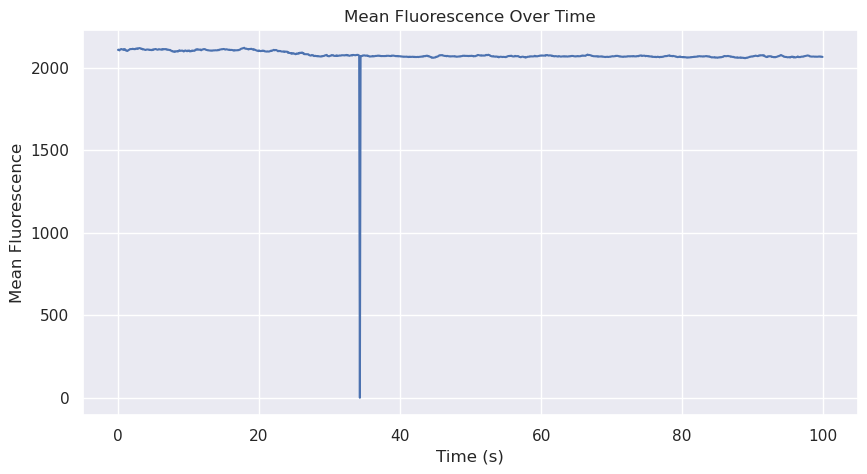

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get the OnePhotonSeries data
one_photon_series = nwb.acquisition["OnePhotonSeries"]
data = one_photon_series.data
num_frames = data.shape[0]
width = data.shape[1]
height = data.shape[2]

# Calculate the mean fluorescence for each frame
mean_fluorescence = np.mean(data[:1000, :, :], axis=(1, 2))

# Create a time vector
time = np.arange(0, len(mean_fluorescence)) / one_photon_series.imaging_plane.imaging_rate

# Plot the mean fluorescence over time
plt.figure(figsize=(10, 5))
plt.plot(time, mean_fluorescence)
plt.xlabel("Time (s)")
plt.ylabel("Mean Fluorescence")
plt.title("Mean Fluorescence Over Time")
plt.show()

The above plot shows the mean fluorescence over time, with a sharp drop in fluorescence around the 35-second mark. This could be due to a variety of factors, such as a change in the recording conditions, a movement artifact, or a genuine change in neuronal activity.

## Examining Image Masks
The following code shows the image masks

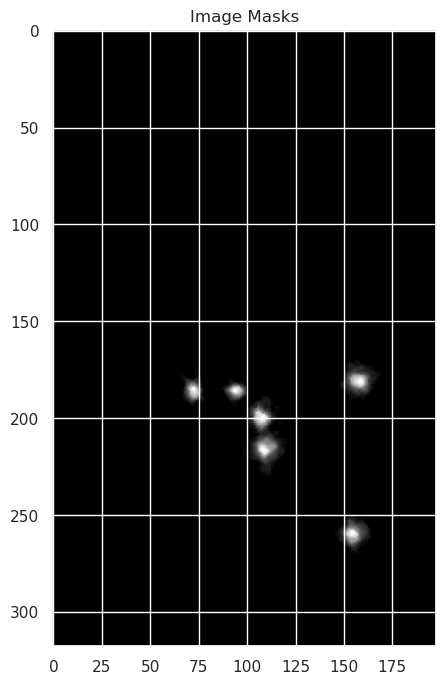

In [4]:
plane_segmentation = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
image_masks = plane_segmentation.image_mask[:]

# Plot the image masks
plt.figure(figsize=(8, 8))
plt.imshow(np.max(image_masks, axis=0), cmap='gray')
plt.title("Image Masks")
plt.show()

These image masks show the outline of the cells that were being imaged/

## Exploring Activity Patterns of Individual ROIs

The following code shows how to load the fluorescence traces for a few ROIs and plot them.

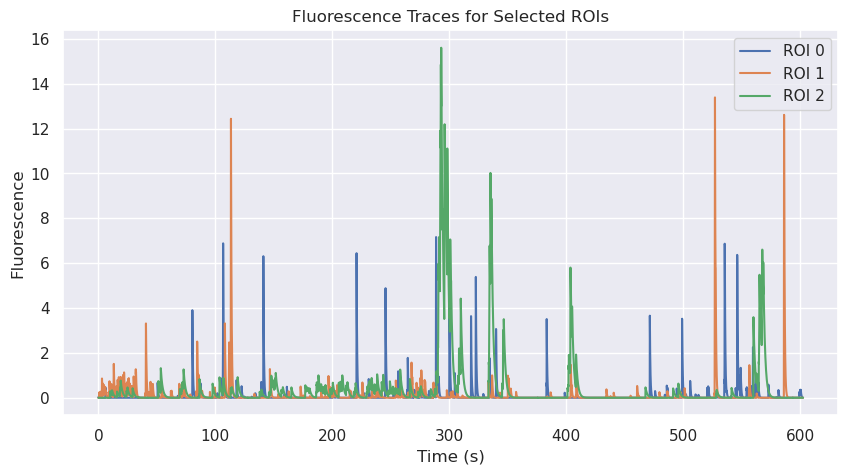

In [5]:
# Get the fluorescence traces
roi_response_series = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"]
data = roi_response_series.data
num_frames = data.shape[0]
num_rois = data.shape[1]

# Select a few ROIs to plot
roi_ids = [0, 1, 2]

# Create a time vector
time = np.arange(0, num_frames) / roi_response_series.rate

# Plot the fluorescence traces for the selected ROIs
plt.figure(figsize=(10, 5))
for roi_id in roi_ids:
    plt.plot(time, data[:, roi_id], label=f"ROI {roi_id}")

plt.xlabel("Time (s)")
plt.ylabel("Fluorescence")
plt.title("Fluorescence Traces for Selected ROIs")
plt.legend()
plt.show()

The above plot shows the fluorescence traces for three ROIs. ROI 0 (blue) and ROI 1 (orange) display sporadic, high-amplitude spikes, while ROI 2 (green) shows frequent, moderate peaks in fluorescence activity. Differences in peak frequency and amplitude suggest distinct activity patterns between ROIs.

## Summary and Future Directions

This notebook has shown how to load and visualize calcium imaging data from a DANDI archive. We have demonstrated how to load the Dandiset using the DANDI API, load an NWB file, examine its metadata, load and visualize the calcium imaging data, and explore the activity patterns of individual ROIs.

Possible future directions for analysis include:

*   Performing spike detection to identify individual neuronal events.
*   Performing spike sorting to identify different types of neurons.
*   Examining the correlations between the activity of different ROIs.
*   Relating the neuronal activity to the behavior of the animal.